## Bio-Signal Analysis for Smoking

### Problem Statement

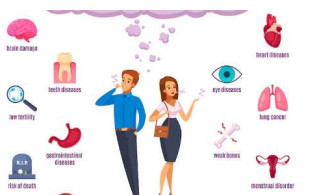

<style>
.rendered_html {
  color: Blue;
}
</styl

### You are working as a data scientist in a global company. Over the years, the company has collected details and gathered a lot of information about individuals. The management wants to build an intelligent system from the data to determine the presence or absence of smoking in a person through bio-signals. Given a person’s information, build a machine learning model that can classify the presence or absence of smoking


### You are working as a data scientist in a global company. Over the years, the company has collected details and gathered a lot of information about individuals. The management wants to build an intelligent system from the data to determine the presence or absence of smoking in a person through bio-signals. Given a person’s information, build a machine learning model that can classify the presence or absence of smoking

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\hp\Desktop\smoking.csv")

In [3]:
print('The data have shape of {}'.format(df.shape))

The data have shape of (55692, 27)


### This dataset is a collection of basic health biological signal data which contains around 55K record with 27 attributes

In [4]:
df.sample(5)

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
55661,55487,M,60,170,55,77.0,0.7,0.5,1.0,1.0,...,12.4,1.0,1.0,13.0,8.0,21.0,Y,0,N,1
23023,28754,F,40,155,55,87.0,0.7,1.0,1.0,1.0,...,13.5,1.0,0.7,21.0,14.0,27.0,Y,0,N,1
51183,33450,F,40,170,60,70.0,1.2,1.0,1.0,1.0,...,14.0,1.0,0.7,14.0,9.0,10.0,Y,0,N,0
17915,22358,F,40,160,55,74.0,0.6,0.8,1.0,1.0,...,12.6,1.0,0.9,24.0,14.0,11.0,Y,0,Y,0
46446,9297,M,40,170,80,92.0,0.8,1.5,1.0,1.0,...,16.2,1.0,0.8,19.0,26.0,17.0,Y,1,Y,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [6]:
df['oral'].value_counts() # we can see that oral contain same type of variable of we can drop it .

Y    55692
Name: oral, dtype: int64

In [7]:
df = df.drop(['oral','ID'],axis=1)

In [8]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,76.004830,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,9.679278,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,146.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


### Checking out the missing values in a dataframe 

In [9]:
df.isnull().sum() # there is no null values in the data

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [10]:
#for i in df.columns:
    #print(i,"-",df[i].unique())#checking for the unqiue character in the dataframe clolums all looks good

## EDA

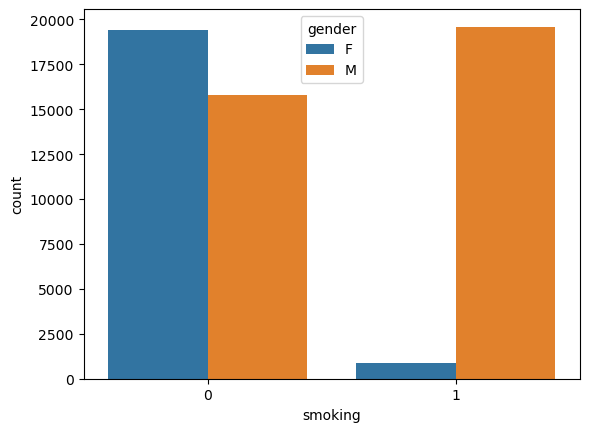

In [11]:
sns.countplot(x=df['smoking'],hue=df['gender'])
plt.show() #males are in high number for smoking in compare to female 

<Axes: ylabel='smoking'>

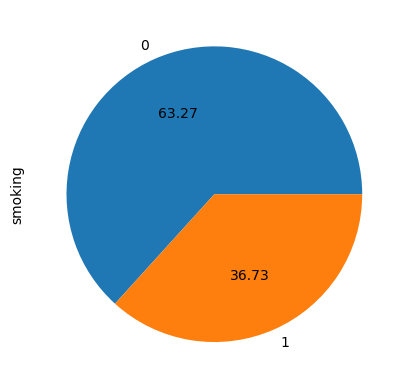

In [12]:
df['smoking'].value_counts().plot.pie(autopct='%0.2f')

In [13]:
##There are 36.73 percent of the people who are smoking ciggarette.

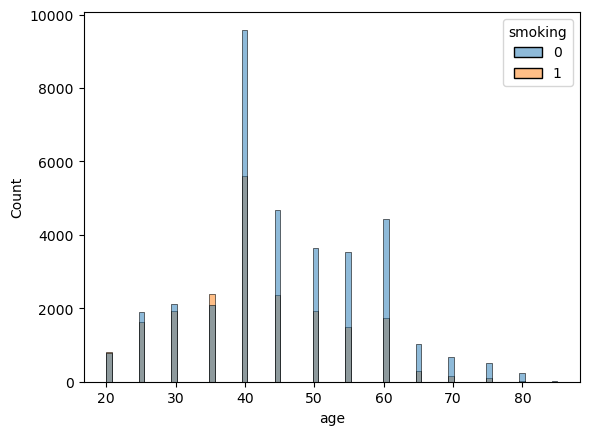

In [14]:
sns.histplot(x=df['age'],hue=df['smoking'])
plt.show()

In [15]:
##Most number of smokers are having the age 40

In [16]:
# lets check for the distribution of int columns 
#num = df.select_dtypes(int and float)
#sns.pairplot(num)

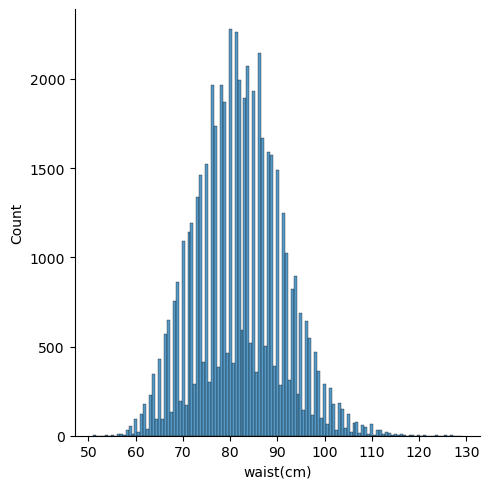

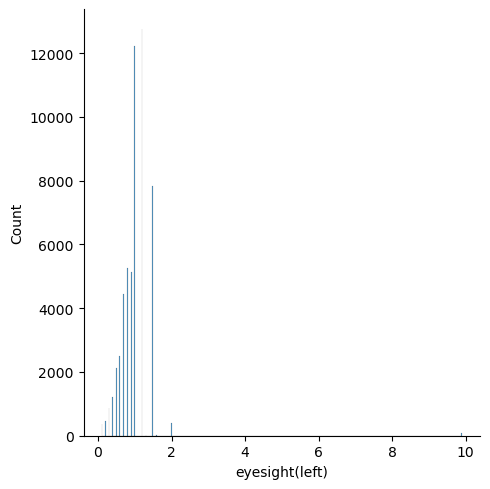

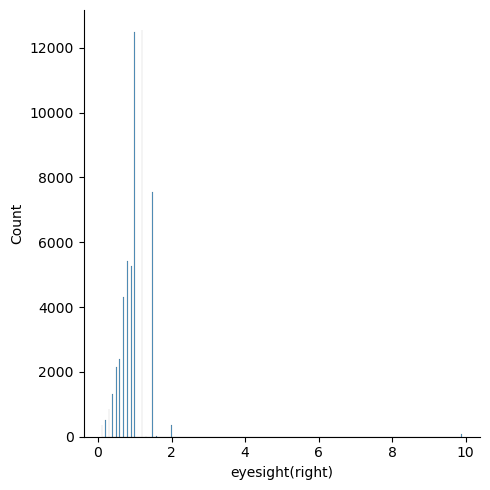

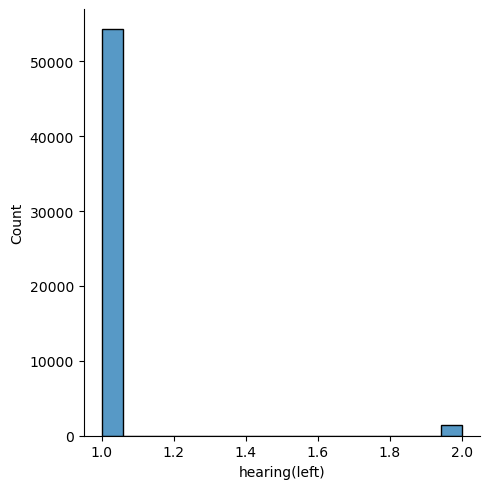

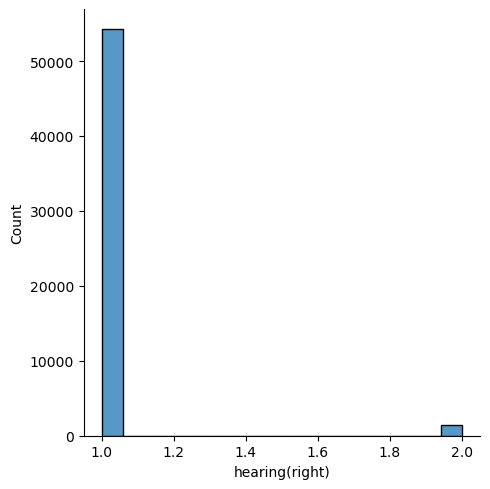

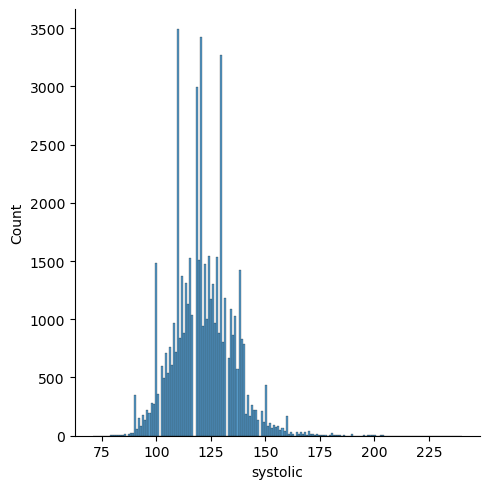

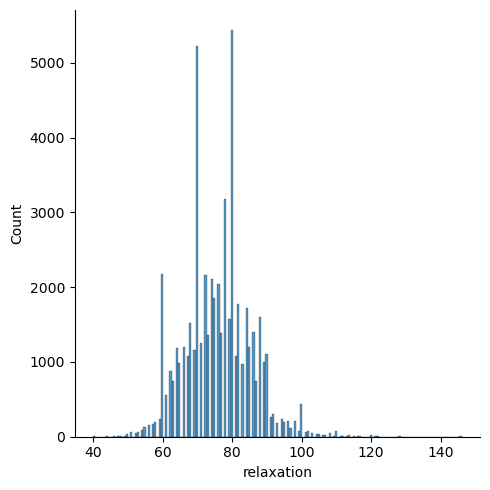

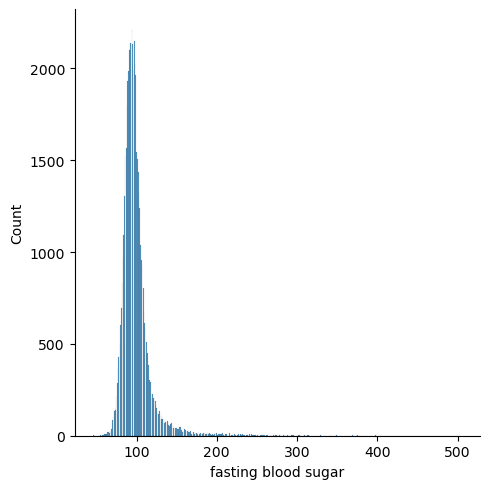

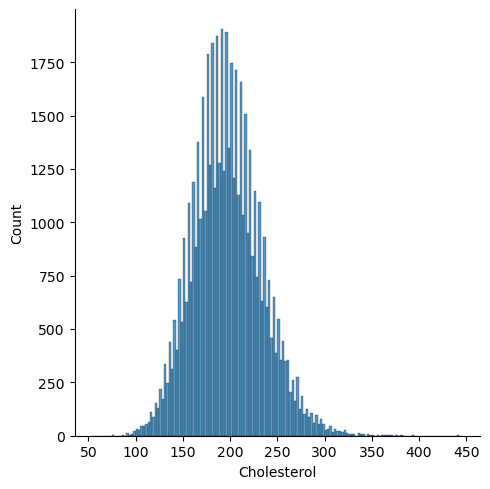

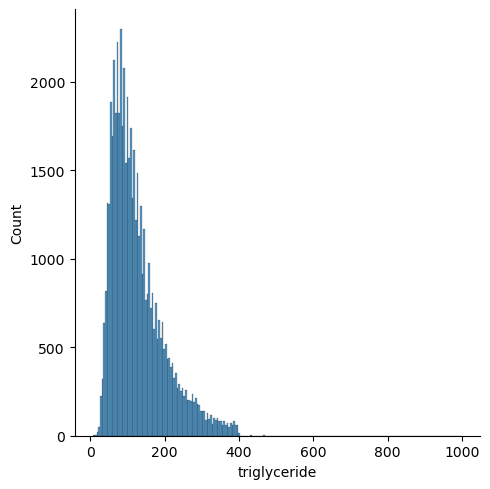

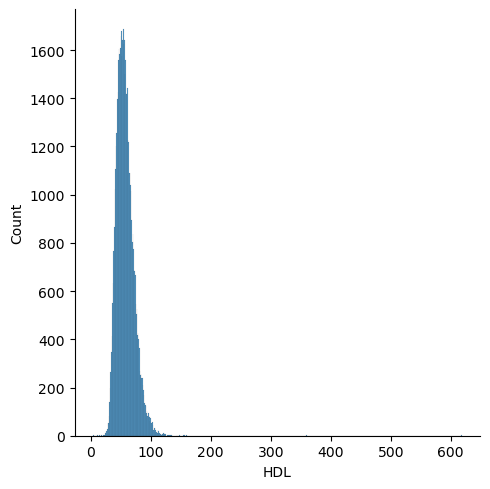

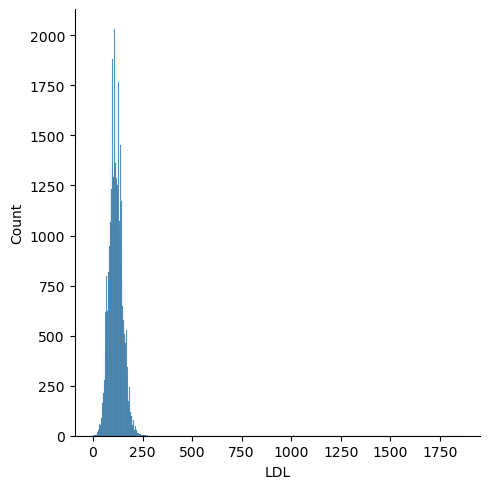

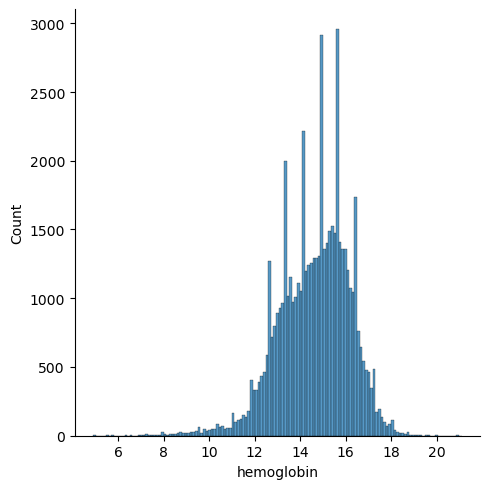

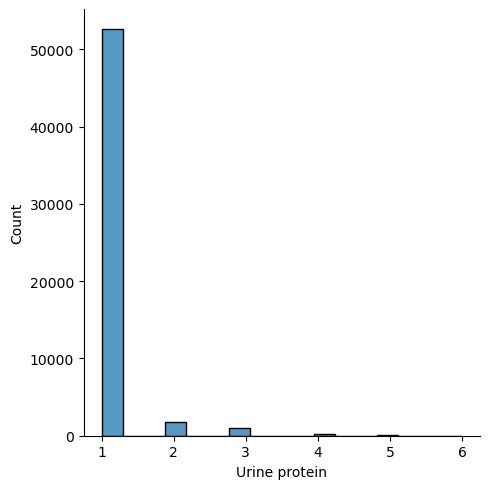

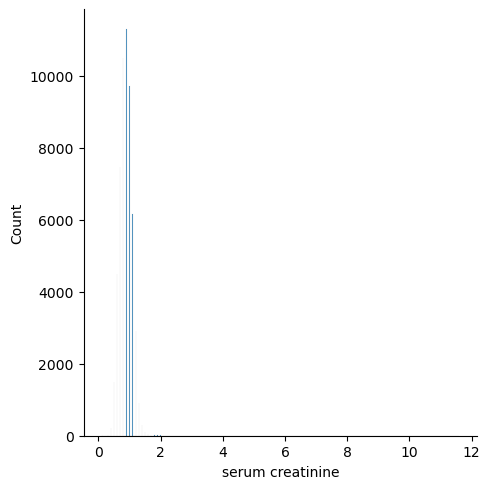

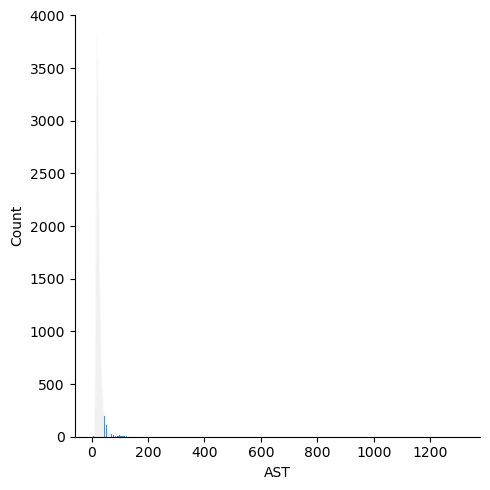

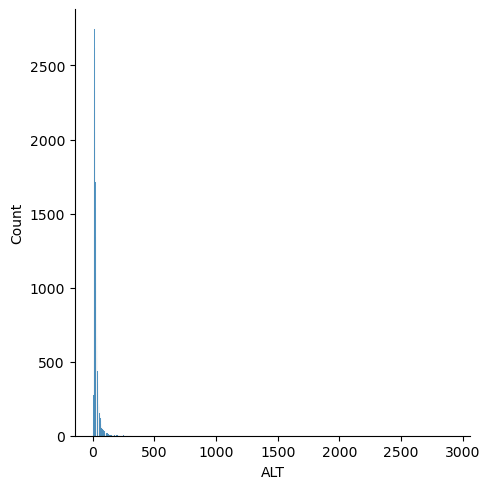

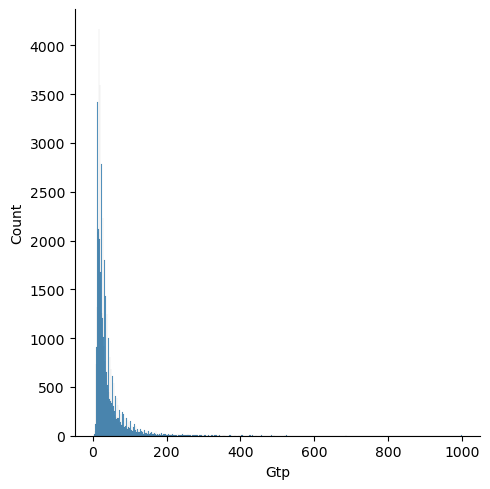

In [17]:
for i in df.columns:
    if (df[i].dtype==int or df[i].dtype==float):
        sns.displot(df[i])
        plt.show()

In [18]:
## most of the columns follow kind of normal distribution except for few having binomial distribution. 

In [19]:
### However, it's important to note that transforming the data into a normal distribution is not always the best solution. 
## Some classification algorithms, such as decision trees or random forests, 
##are not affected by the distribution of the data and may perform well even on skewed or non-normal data. 
##In addition, transforming the data can sometimes introduce new issues, such as overfitting or loss of information.

### Outlier Dedection

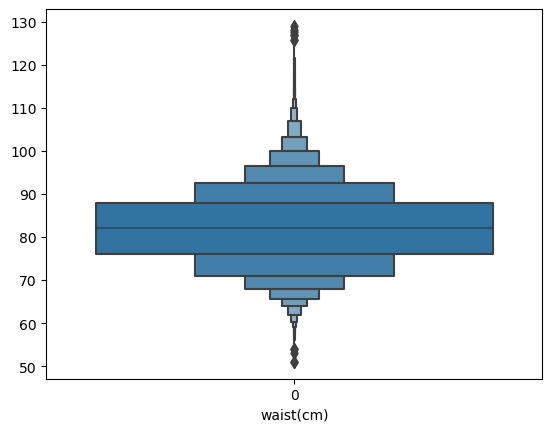

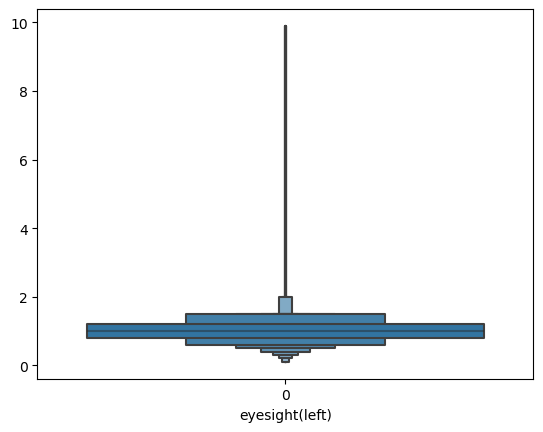

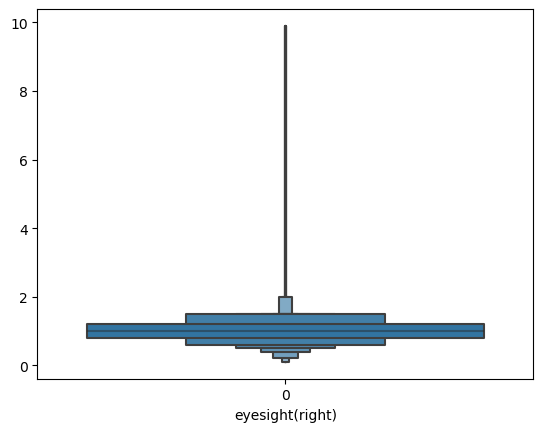

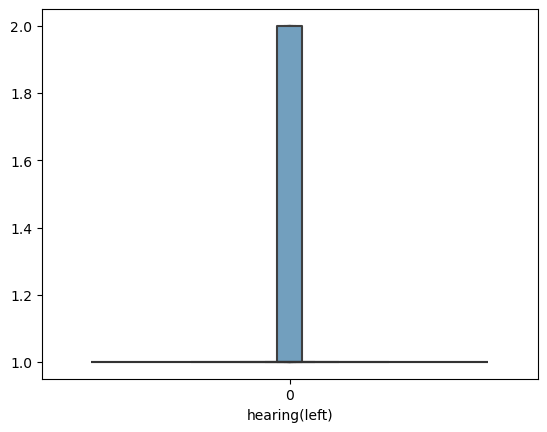

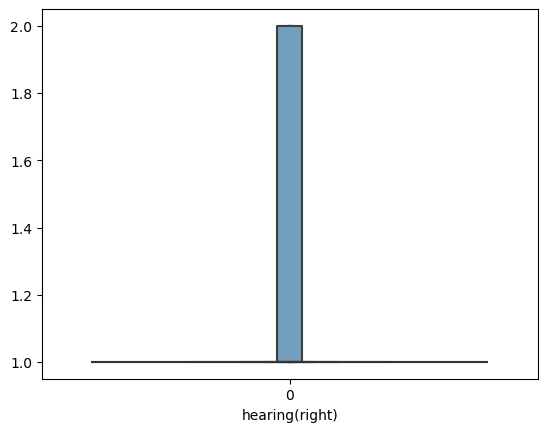

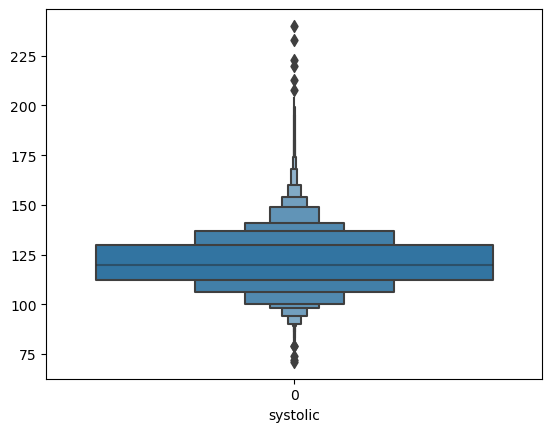

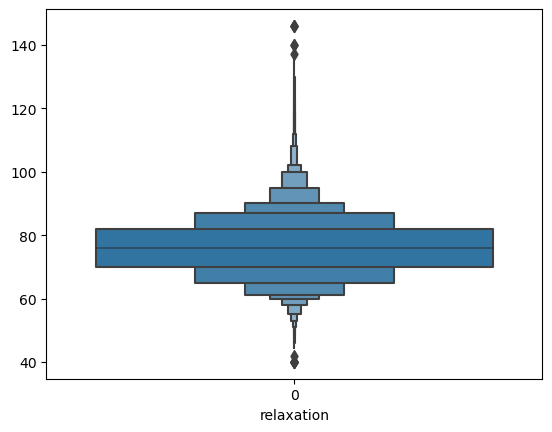

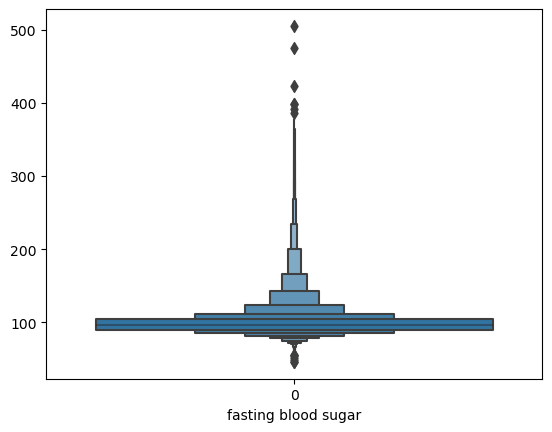

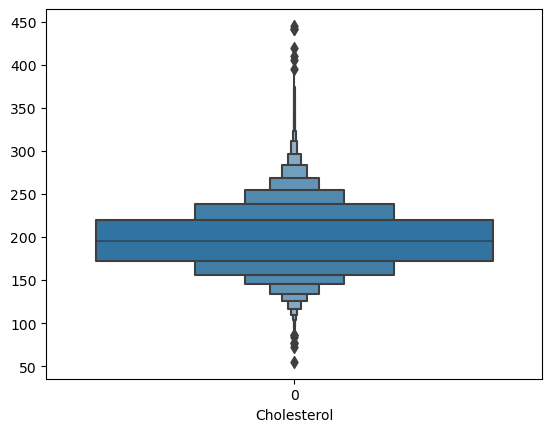

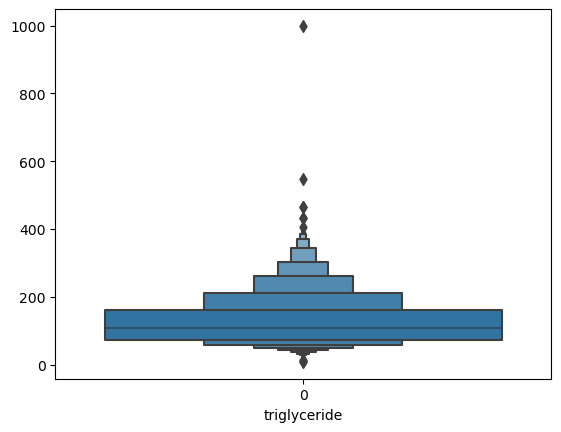

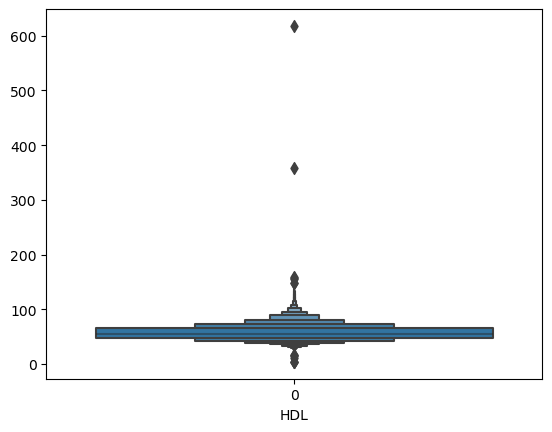

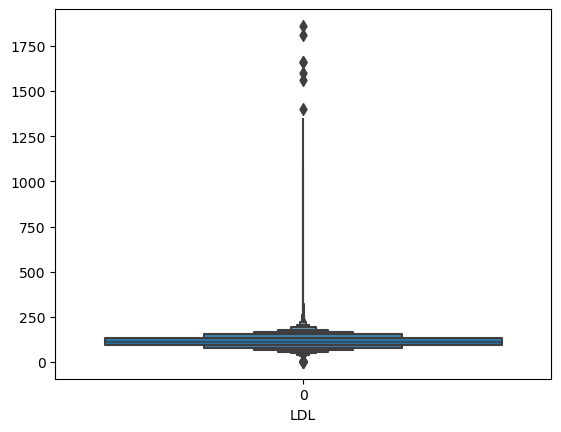

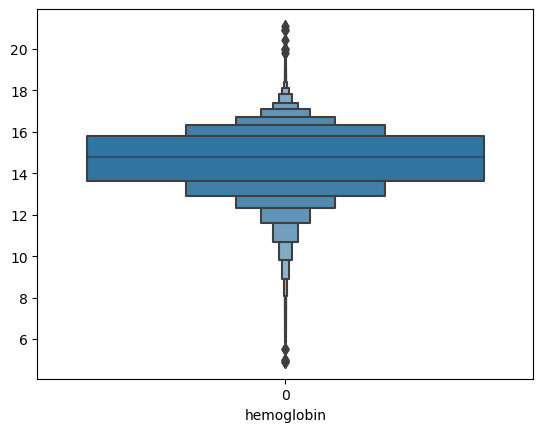

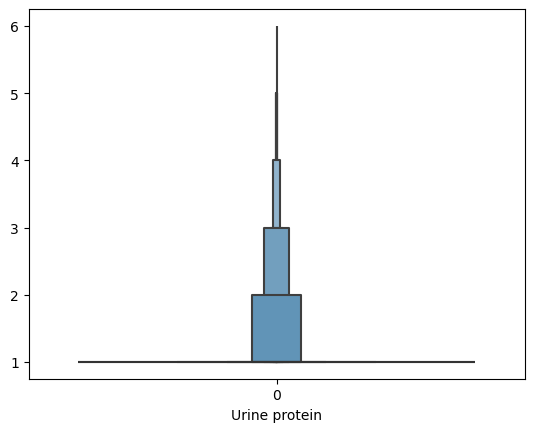

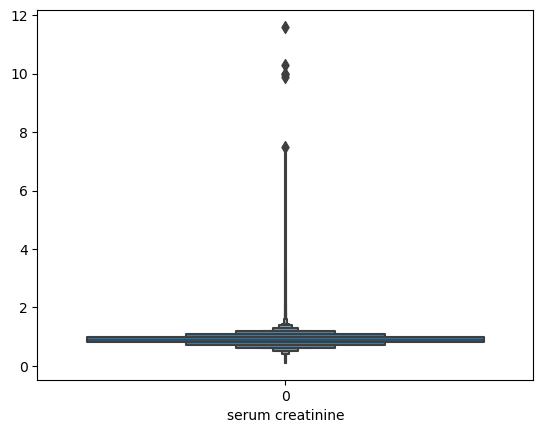

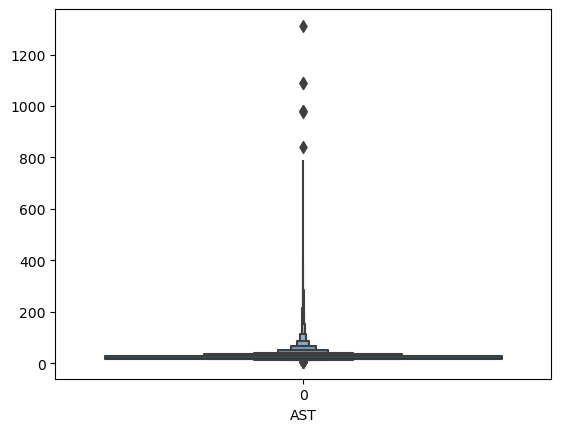

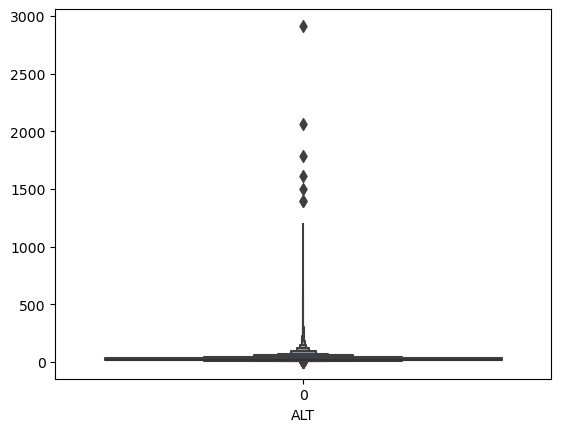

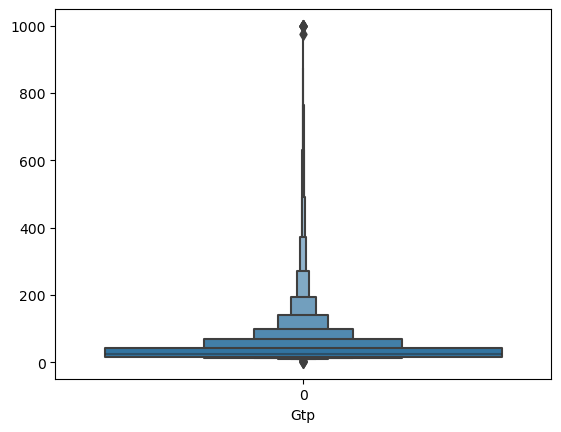

In [20]:
for i in df.columns:
    if(df[i].dtype==int or df[i].dtype==float):
        sns.boxenplot(df[i])
        plt.xlabel(i)
        plt.show()

In [21]:
## We have outliers in the data but I am not removng the data , As its a classification dedetction problem we may loss some \
## usefull insght and patners our model is looking for 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

## Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['tartar'] = le.fit_transform(df['tartar'])

### Feature Selction 

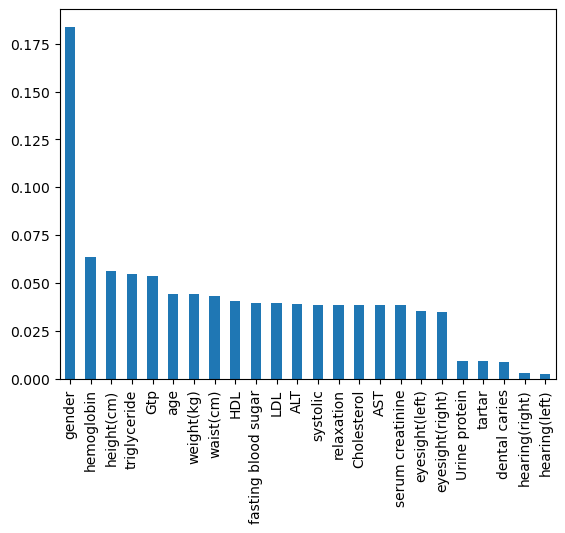

In [24]:
## useing the tree algorithm 
X = df.drop('smoking',axis=1)
y = df['smoking']
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
df1 = pd.Series(model.feature_importances_,X.columns)
df1.nlargest(24).plot(kind='bar')
plt.show()

In [25]:
# we will select the top 15 feature for model

## Logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [27]:
X_new = df[['gender','height(cm)','hemoglobin','triglyceride','Gtp','age','waist(cm)','weight(kg)','HDL','fasting blood sugar',
        'LDL','ALT','systolic','relaxation','AST']]
y = df['smoking']

In [28]:
lr = LogisticRegression()
sc = StandardScaler()
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.20,random_state=42)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.7302271299039411
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      6606
           1       0.69      0.62      0.65      4533

    accuracy                           0.73     11139
   macro avg       0.72      0.71      0.72     11139
weighted avg       0.73      0.73      0.73     11139



## The accuracy of the logistic regression model is 73 percentage

## DECISION TREE 

In [29]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)
dc_pred = dc.predict(X_test)
print(accuracy_score(dc_pred,y_test))
print(classification_report(dc_pred,y_pred))

0.7835532812640273
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      6974
           1       0.63      0.68      0.66      4165

    accuracy                           0.73     11139
   macro avg       0.72      0.72      0.72     11139
weighted avg       0.74      0.73      0.73     11139



## The accurecy for decision tree is 78 percent

 ## BAGGING ALGORITHM

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.8270042194092827
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      6902
           1       0.78      0.76      0.77      4237

    accuracy                           0.83     11139
   macro avg       0.82      0.81      0.82     11139
weighted avg       0.83      0.83      0.83     11139



## Boosting Algo

In [33]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train,y_train)
y_ped = xg.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.8270042194092827
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      6902
           1       0.78      0.76      0.77      4237

    accuracy                           0.83     11139
   macro avg       0.82      0.81      0.82     11139
weighted avg       0.83      0.83      0.83     11139

